# HEART FAILURE PREDICTION


In [1]:
# Data clearnning and EDA
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

## I. Exploratory Data Analysis

In this section, some basic investigation about the data is performed to gain deeper insight about the data set. Then, more analysis is conducted to answer our research question.

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 1. Overview on data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


There are 13 rows in the above table representing 13 clinical features in the patients’ profile: 12 complementary features and one target feature (death event). There is no null value for all features and the type of data is either of type float or integer, which means the data is cleaned and ready to be analysed.

In [5]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
health_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

In [6]:
data[numerical_features].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


The statistical quantitative characteristics of the numerical feature of the dataset is reported in the table above. The total number, mean value, standard deviation, minimum value and maximum value, and the quartiles of the numeric features are taken in full sample (all patients). The calculated quantitative description of each  feature then can be used to build their respective box plot.


##### Age

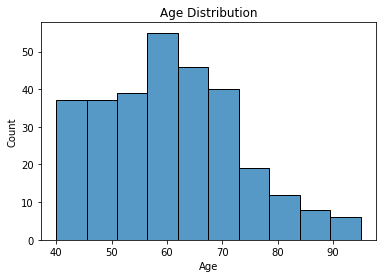

In [7]:
sns.histplot(x=data.age)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

The age distribution is shown in the above bar chart. All of the patients are between 40 and 95 years old with most of them being from 40 to 72 years old. The patients’ number of 56 to 62 years old got the highest count, with more than 50 people. From the age of 75 onwards, the patients’ number decreased in proportional to their age range. Three last columns of age ranges got the least number of patients (under 10 patients). 


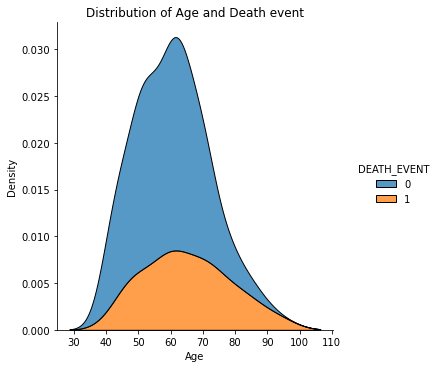

In [8]:
sns.displot(data=data, x="age", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of Age and Death event')
plt.xlabel('Age')
plt.show() 

The age and death event distribution is shown in the following line chart. The area between two curves indicates the number of survived patients with respect to their age, while the area between lower curve and the horizontal axis shows the number of dead patients. In detail, the area of survived patients increases from the age of 45 to 75 before decreasing after the age of 75. The peak of survival density of above 0.03 is between 60 and 70 years old. The patients of 80 years old or above had the slimmest density of survival with below 0.01 survival density compared to 0.005 death density. 


##### Ejection fraction

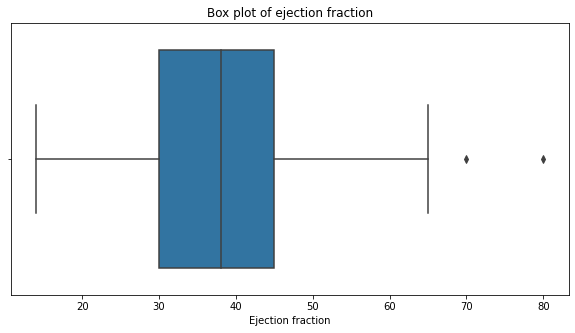

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=data.ejection_fraction, ax=ax)
plt.title('Box plot of ejection fraction')
plt.xlabel('Ejection fraction')
plt.show()

The box plot of ejection fraction is as shown in above table. The mean value is 38%, the Q1 and Q3 are 30% and 45% respectively. The minimum value is 10% and the maximum value is 65%.  


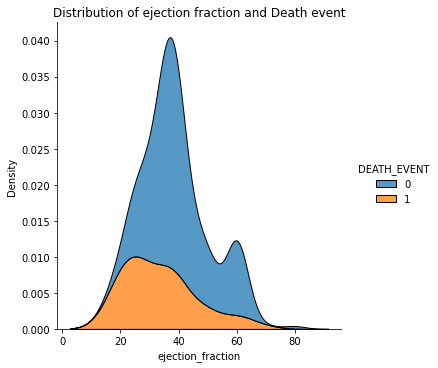

In [10]:
sns.displot(data=data, x="ejection_fraction", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of ejection fraction and Death event')
plt.xlabel('ejection_fraction')
plt.show()

The distribution of ejection fraction and death event is shown as above. The area between two curves represents the survival density while the area between the lower curve and the horizontal axis is the death density. The survival density reaches its peak of above 0.04 at around 40% of the ejection fraction, however, drops significantly if the ejection fraction is either below 20% or above 70%. 

##### Creatinine phosphokinase

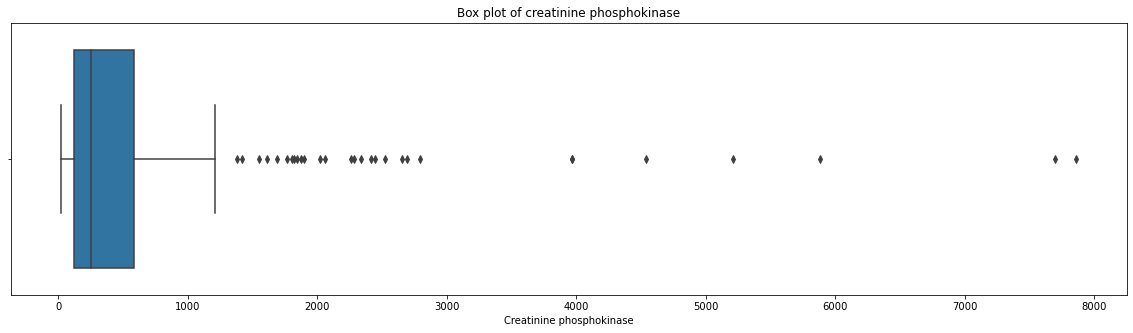

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.creatinine_phosphokinase, ax=ax)
plt.title('Box plot of creatinine phosphokinase')
plt.xlabel('Creatinine phosphokinase')
plt.show()

There are many outlier in Creatinine phosphokinase feature. We can consider eliminate those during feature engineering process.

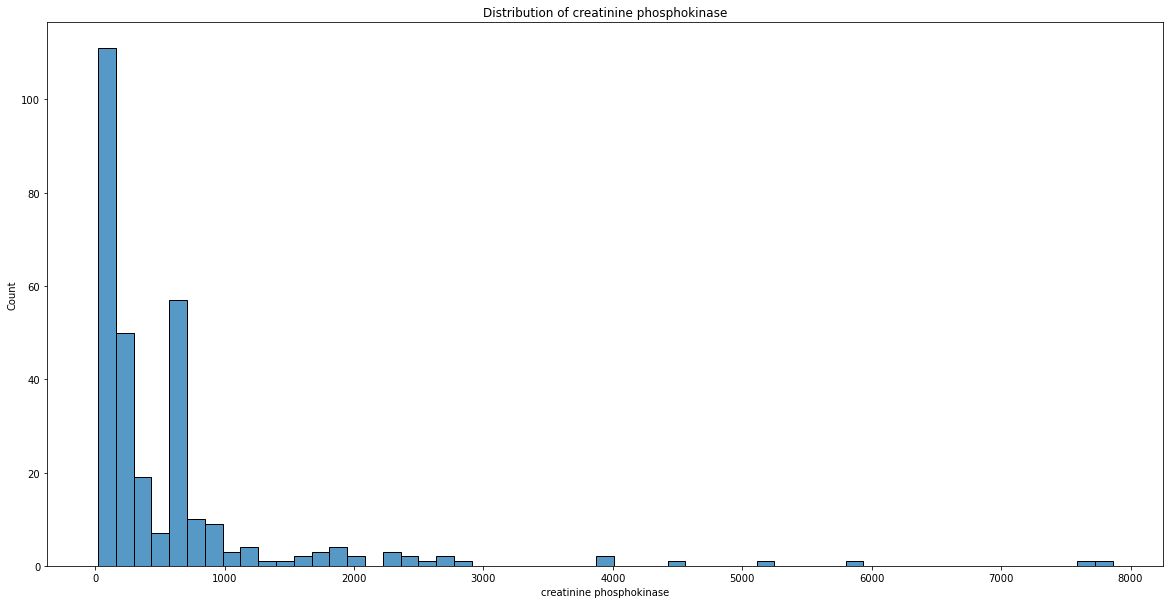

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(x=data.creatinine_phosphokinase, ax=ax)
plt.title('Distribution of creatinine phosphokinase')
plt.xlabel('creatinine phosphokinase')

plt.show()

The distribution of creatinine phosphokinase is shown in the above bar chart. The level of CPK enzyme in the blood is mostly distributed from 0 to below 3000 mcg/L. 


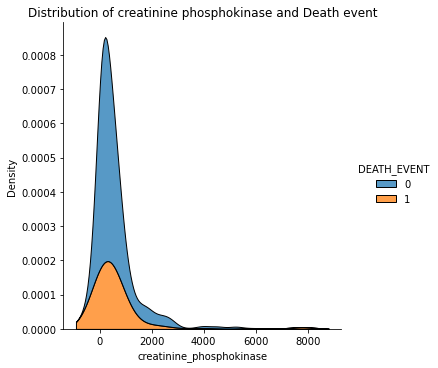

In [13]:
sns.displot(data=data, x="creatinine_phosphokinase", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of creatinine phosphokinase and Death event')
plt.xlabel('creatinine_phosphokinase')
plt.show()

The distribution of creatinine phosphokinase and death events. The survival density is enlarged when the level of CPK enzyme in the blood is from 0 to 1000 mcg/L and decreases if the creatinine phosphokinase level is higher than 2000 mcg/L. 


##### Plateletes

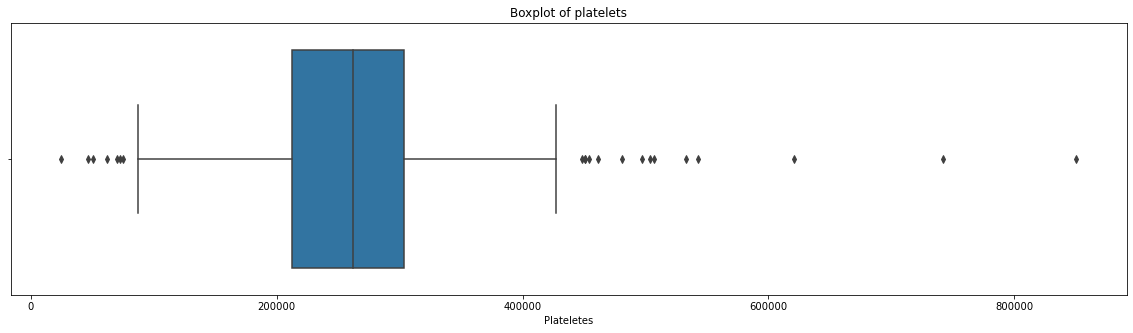

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.platelets, ax=ax)
plt.title('Boxplot of platelets')
plt.xlabel('Plateletes')
plt.show()

The box plot of platelets shows the mean value of platelets in blood of all patients is 260 kiloplatelets/mL. The Q1 and Q3 value are 220 kiloplatelets/mL and 300 kiloplatelets/mL, respectively. There are many outliers in the box plot. 


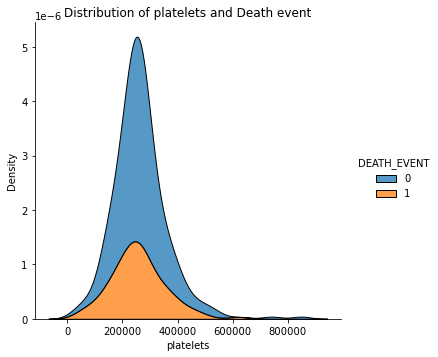

In [15]:
sns.displot(data=data, x="platelets", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of platelets and Death event')
plt.xlabel('platelets')
plt.show()

The distribution of platelets and death events is in the above line chart. The area of survival, which lies between two curves, increases when the platelets in blood is from 200 kiloplatelets/mL to 350 kiloplatelets/mL, however, decreases when the platelets drops out of the range. 


##### Serum creatinine

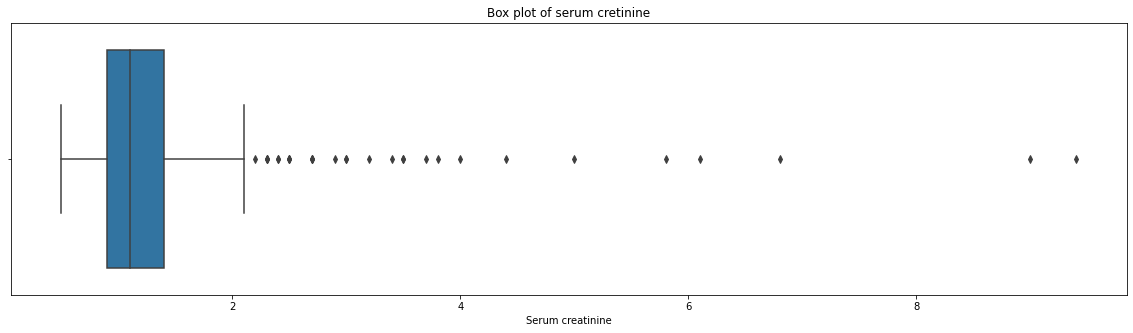

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.serum_creatinine, ax=ax)
plt.title('Box plot of serum cretinine')
plt.xlabel('Serum creatinine')
plt.show()

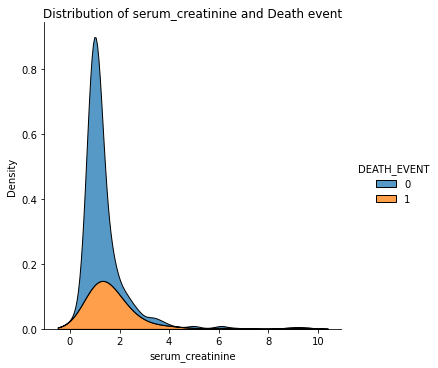

In [17]:
sns.displot(data=data, x="serum_creatinine", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of serum_creatinine and Death event')
plt.xlabel('serum_creatinine')
plt.show()

The distribution of serum creatinine and death events is shown in the above line chart. The survival density area lying between two curves increases when the level of creatinine in the blood is between 1 mg/dL and 1.8 mg/dL. However, the survival density decreases dramatically when the level of creatinine is either below 1 mg/dL or above 2 mg/dL. 


##### Seruim sodium

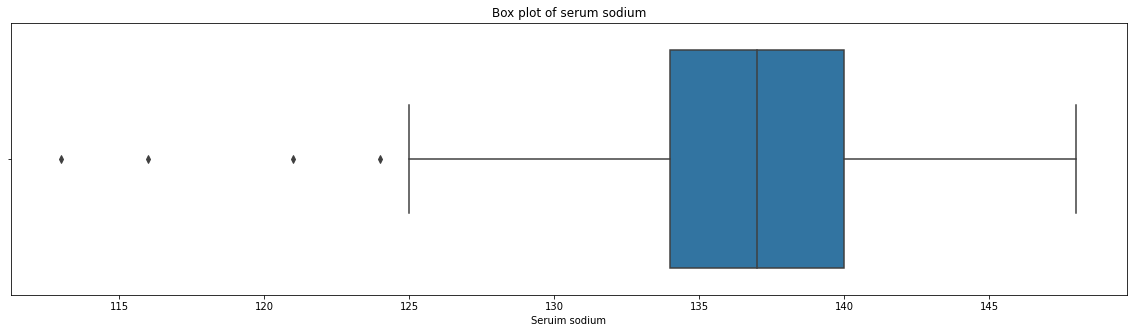

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.serum_sodium, ax=ax)
plt.title('Box plot of serum sodium')
plt.xlabel('Seruim sodium')
plt.show()

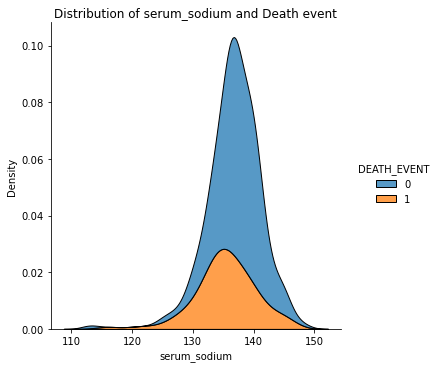

In [19]:
sns.displot(data=data, x="serum_sodium", hue="DEATH_EVENT", multiple="stack", kind='kde')
plt.title('Distribution of serum_sodium and Death event')
plt.xlabel('serum_sodium')
plt.show()

The minimum value of serum sodium is 125 mEq/L. The Q1 and Q3 values are 134 mEq/L and mEq/L respectively. The mean is 137 mEq/L. The maximum value is 150 mEq/L. There are many outliers to the left. 


##### Time

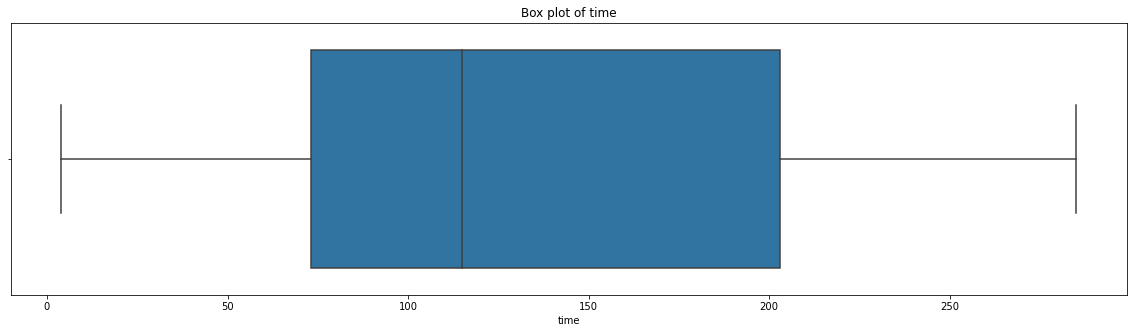

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=data.time, ax=ax)
plt.title('Box plot of time')
plt.show()

Average value of follow-up time is 130 days. The patients had the follow-up time of 4-285 days. 


#### Categorical features

##### Anaemia

Text(0.5, 1.0, 'The number of people has and do not have anaemia')

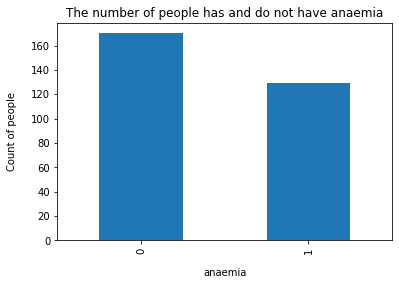

In [21]:
data['anaemia'].value_counts().plot(kind='bar')
plt.xlabel("anaemia", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people has and do not have anaemia')

The number of the patients did not have anaemia was over 160 patients. The number of patients had anaemia was 40 patients less than the one had not, which was over 120 patients. 


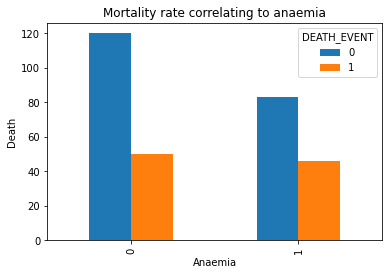

In [22]:
pd.crosstab(data.anaemia  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

##### Diabetes

Text(0.5, 1.0, 'The number of people has and do not have diabetes')

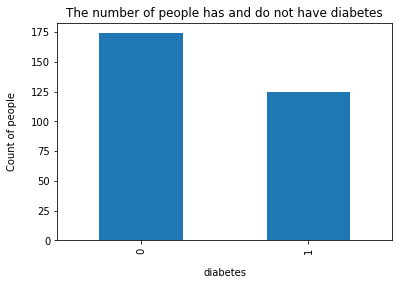

In [23]:
data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel("diabetes", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people has and do not have diabetes')

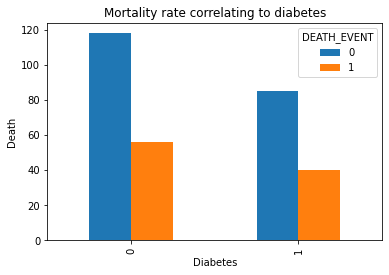

In [24]:
pd.crosstab(data.diabetes  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Death')
plt.show()

For the patient who did not have diabetes, the survived patients were nearly 120 patients and the dead patients were around 55 patients. For one who had, the dead patients’ number was over 80 and the dead patients were below 50 patients. 


##### High blood pressure

Text(0.5, 1.0, 'The number of people with or without high_blood_pressure')

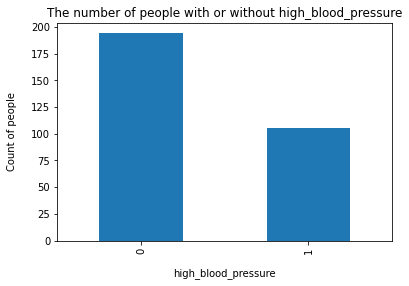

In [25]:
data['high_blood_pressure'].value_counts().plot(kind='bar')
plt.xlabel("high_blood_pressure", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('The number of people with or without high_blood_pressure')

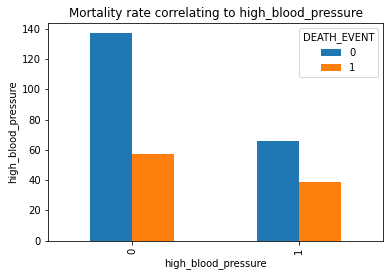

In [26]:
pd.crosstab(data.high_blood_pressure  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to high_blood_pressure')
plt.ylabel('high_blood_pressure')
plt.show()

For those who had hypertension, the dead patients were 40 patients, compared to 65 survived patients. While the number of dead patients were 55 patients compared to nearly 140 survived patients in the group of non-hypertension patients. 


##### Gender

Text(0.5, 1.0, 'Number of male and female')

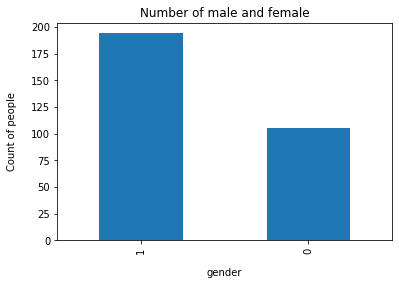

In [27]:
data['sex'].value_counts().plot(kind='bar')
plt.xlabel("gender", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of male and female')

##### Smoking

Text(0.5, 1.0, 'Number of patient smoke')

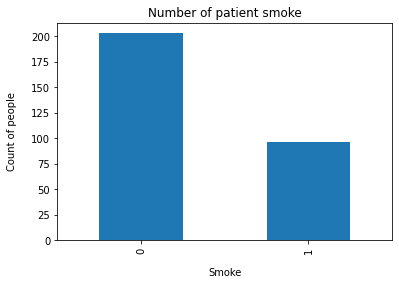

In [28]:
data['smoking'].value_counts().plot(kind='bar')
plt.xlabel("Smoke", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of patient smoke')

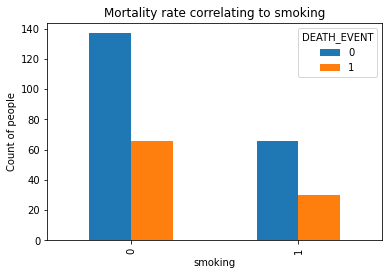

In [29]:
pd.crosstab(data.smoking  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Mortality rate correlating to smoking')
plt.ylabel('Count of people')
plt.show()

The number of dead patients who did smoke was 30, compared to over 60 dead patients who did not. The survived patients who did smoke were 60, while the survived patients who did not smoke were nearly 140 patients. 


##### Death event

Text(0.5, 1.0, 'Number of death patients')

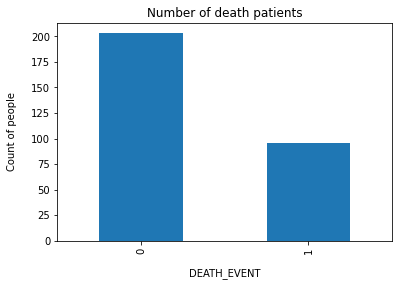

In [30]:
data['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.xlabel("DEATH_EVENT", labelpad=14)
plt.ylabel("Count of people", labelpad=14)
plt.title('Number of death patients')

In [31]:
data['DEATH_EVENT'].value_counts()


0    203
1     96
Name: DEATH_EVENT, dtype: int64

There were around 200 dead patients and nearly 100 survived patients. We can see that there exist an imbalance between two value in the target of the data set (death event).


#### 2. The patients’ age and sex affect the their health’s indicators 



In [32]:
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
# rsquared: get r squared
# fvalue: get f value
# f_pvalue: get p value
# params: get coefficient
# tvalues: get t-statistic

test_results = []
coef_results = []
t_results = []
for feature in health_features:
    results = smf.ols(feature + ' ~ age + sex', data=data).fit()
    
    test_values = [round(results.rsquared, 3), round(results.fvalue, 3), round(results.f_pvalue, 3)]
    test_results.append(test_values)
    coef_values = [round(results.params[1], 4), round(results.params[2], 4)]
    coef_results.append(coef_values)
    t_values = [round(results.tvalues[1], 3), round(results.tvalues[2], 3)]
    t_results.append(t_values)
    
    print('\033[1m ANOVA of age and sex with', feature,'\033[0m')
    print(results.summary())
    print('\n')

 ANOVA of age and sex with anaemia 
                            OLS Regression Results                            
Dep. Variable:                anaemia   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.697
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0691
Time:                        05:11:10   Log-Likelihood:                -211.47
No. Observations:                 299   AIC:                             428.9
Df Residuals:                     296   BIC:                             440.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

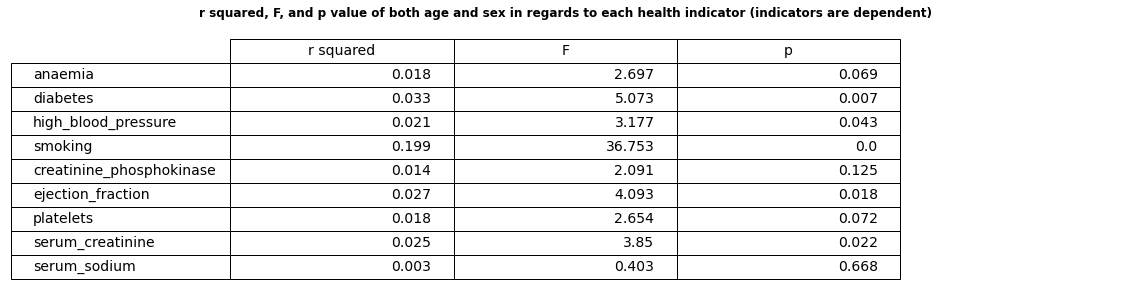

In [34]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = test_results,  
    rowLabels = health_features,  
    colLabels = ['r squared', 'F', 'p'],
    colWidths = [0.1] * 3,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('r squared, F, and p value of both age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

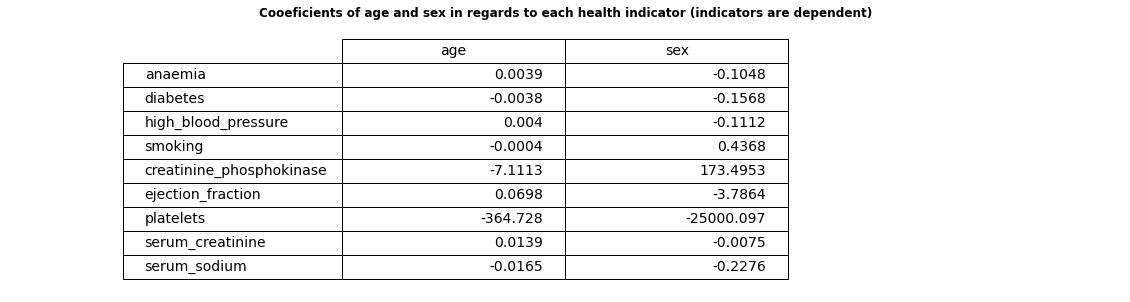

In [35]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = coef_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Cooeficients of age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

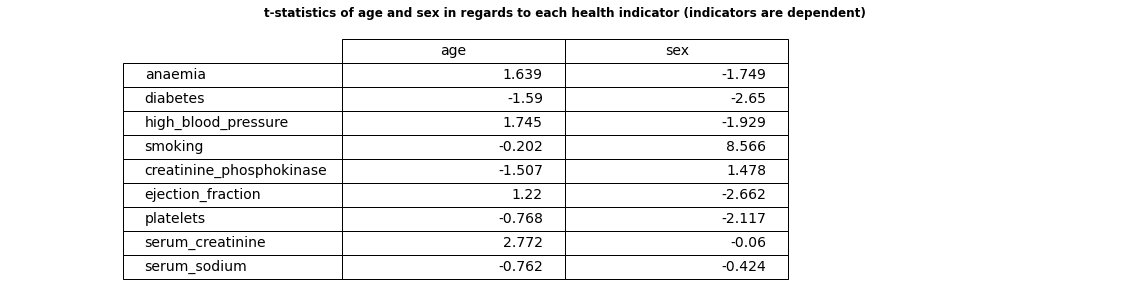

In [36]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = t_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('t-statistics of age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

#### 3. Is health indices affect the mortality rate of patients?



In [37]:
# rsquared: get r squared
# fvalue: get f value
# f_pvalue: get p value
# params: get coefficient
# tvalues: get t-statistic

test_results = []
coef_and_t_results = []
index = 1
results = smf.ols('DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure' +
                  ' + platelets + serum_creatinine + serum_sodium + sex + smoking + time', data=data).fit()

test_values = [round(results.rsquared, 3), round(results.fvalue, 3), round(results.f_pvalue, 3)]
test_results.append(test_values)
while index < len(results.params):
    coef_and_t_values = [round(results.params[index], 4), round(results.tvalues[index], 3)]
    coef_and_t_results.append(coef_and_t_values)
    index += 1

print(results.summary())
print('\n')

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.35e-27
Time:                        05:11:11   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

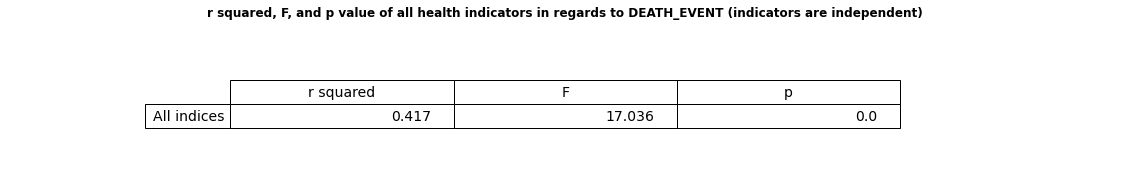

In [38]:
fig, ax = plt.subplots(figsize = (20,3)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = test_results,    
    rowLabels = ['All indices'],
    colLabels = ['r squared', 'F', 'p'],
    colWidths = [0.1] * 3,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('r squared, F, and p value of all health indicators in regards to DEATH_EVENT (indicators are independent)', fontweight ="bold") 
   
plt.show() 

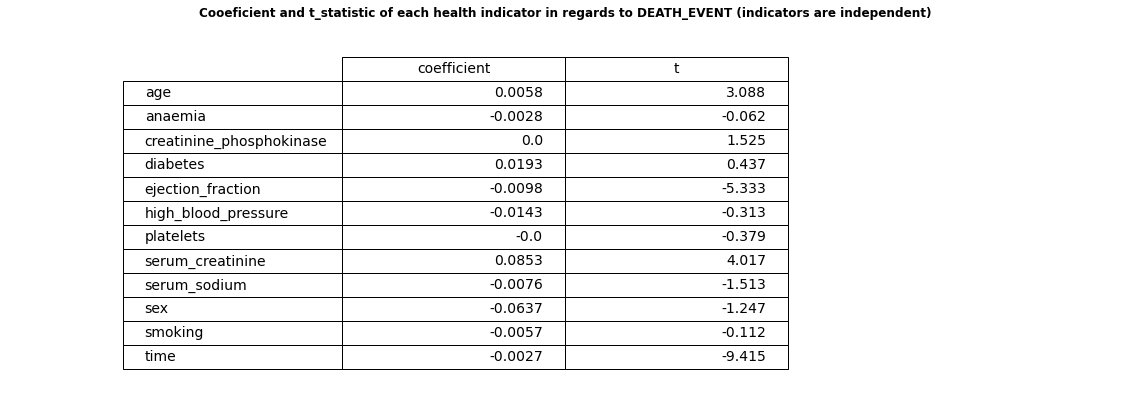

In [39]:
fig, ax = plt.subplots(figsize = (20,7)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = coef_and_t_results,  
    rowLabels = data.columns[:12],  
    colLabels = ['coefficient', 't'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Cooeficient and t_statistic of each health indicator in regards to DEATH_EVENT (indicators are independent)', fontweight ="bold") 
   
plt.show() 

## Predictive analysis

The Exploratory data analysis step above gave us a profound understanding about the data set, thus, the next step is to perform predictive analysis. The aim of this stage is to built a classification model which can made accurate prediction about the death event of given patient. In the next sections, several steps need to performed which are feature engineering, hyperparatunning, data modelling and model evaluation. 

In [40]:
# Import ML library
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb 


### Feature engineering

As stated above, in this section, we have to modify the data set before use it to train model. The steps are:
* split the data
* oversampling data set  

It is noticeable to mention that we have try remove outlier in the data set but not increase the accuracy of the model.

In [41]:
# Split the data into train and test set 
y = data['DEATH_EVENT']
X = data.drop(['DEATH_EVENT', 'time'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [42]:
# Over sampling train data to avoid imbalance data set
from imblearn.over_sampling import SMOTE

df = pd.concat([X_train, y_train], axis=1)

sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(df.drop('DEATH_EVENT', axis=1), df['DEATH_EVENT'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train['DEATH_EVENT'].value_counts()

1    150
0    150
Name: DEATH_EVENT, dtype: int64

In [43]:
X_train = oversampled_trainX.copy()
y_train = oversampled_trainY.copy()

### Evaluation Framework

In [44]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
     INPUT:
    y_train_true: True binary labels of 0 or 1 in the training dataset
    y_train_prob: Probability in range {0,1} predicted by the model for the training dataset
    y_test_true: True binary labels of 0 or 1 in the testing dataset
    y_test_prob: Probability in range {0,1} predicted by the model for the testing dataset
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print ('Train Accuracy: %s ' %acc_train)
    print ('Train AUC: %s ' %auc_train)
    print ('Train Confusion Matrix:')
    print (cm_train)

    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print ('Test Accuracy: %s ' %acc_test)
    print ('Test AUC: %s ' %auc_test)
    print ('Test Confusion Matrix:')
    print (cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.show()

    return best_threshold

In [45]:
def evaluate_model_performance(clf, X_train, y_train):
    '''evaluate a model's accuracy and F1-score
    INPUT:
    clf - Model object
    X_train - Training data matrix
    y_train - Expected model output vector
    OUTPUT:
    clf_accuracy: Model accuracy
    clf_f1_score: Model F1-score
    '''
    y_pred_rf = clf.predict(X_train)
    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    clf_recall_score = recall_score(y_train, y_pred_rf, average='binary')

    return clf_accuracy, clf_f1_score, clf_recall_score

In [46]:
model_score = []

### Data modelling

In this section we use `GridSearchCV` to perform hyperparameter trainning and cross validation. 

1. Gaussian Naive Bayes

In [47]:
%%time

nb_clf =  GaussianNB()

nb_clf.fit(X_train, y_train)  

print('Best Score: ', nb_clf.score(X_val, y_val))

acc, f1, recall = evaluate_model_performance(nb_clf, X_val, y_val)
model_score.append(['Gaussian Naive Bayes', acc, f1, recall])

Best Score:  0.6888888888888889
CPU times: user 8.79 ms, sys: 2.05 ms, total: 10.8 ms
Wall time: 9.21 ms


Train Accuracy: 0.7533333333333333 
Train AUC: 0.7533333333333334 
Train Confusion Matrix:
[[130  20]
 [ 54  96]]
Test Accuracy: 0.6777777777777778 
Test AUC: 0.6489036206017339 
Test Confusion Matrix:
[[43 10]
 [19 18]]


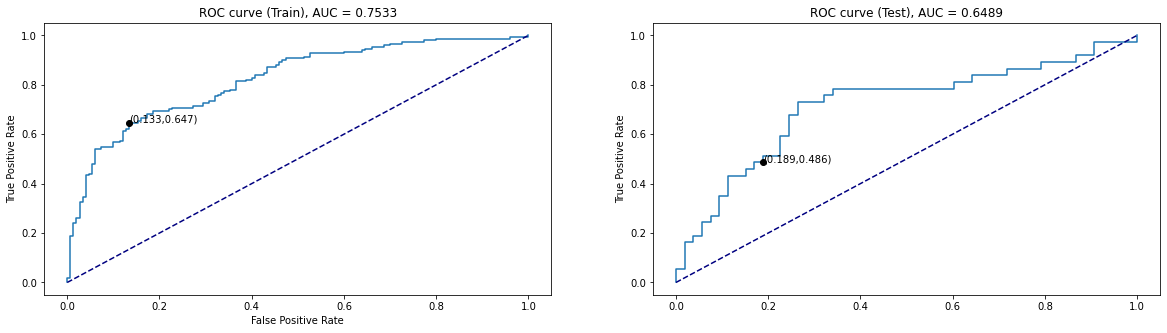

0.5803093556215679

In [48]:
y_test_pred_proba = nb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = nb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

2. Logistic regression

In [49]:
%%time

model =  LogisticRegression()

parameters = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'C': [ 0.01, 0.1, 10, 100],
    'max_iter': [5000, 10000, 20000]
}

log_reg = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
log_reg.fit(X_train, y_train)

print('Best Score: ', log_reg.best_score_*100, '\nBest Parameters: ', log_reg.best_params_)

acc, f1, recall = evaluate_model_performance(log_reg, X_val, y_val)
model_score.append(['Logistic regression', acc, f1, recall])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  76.66666666666667 
Best Parameters:  {'C': 100, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 149 ms, sys: 65.9 ms, total: 215 ms
Wall time: 1.51 s


[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    1.5s finished


Train Accuracy: 0.7933333333333333 
Train AUC: 0.7933333333333334 
Train Confusion Matrix:
[[136  14]
 [ 48 102]]
Test Accuracy: 0.6888888888888889 
Test AUC: 0.6501784803671596 
Test Confusion Matrix:
[[46  7]
 [21 16]]


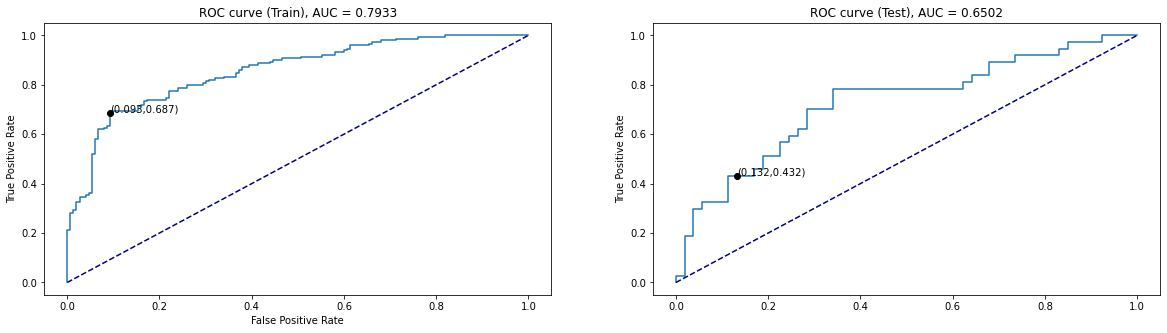

0.643716575821404

In [50]:
y_test_pred_proba = log_reg.predict_proba(X_val)[::,1]
y_train_pred_proba = log_reg.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

3. AdaboostClassifier

In [51]:

%%time

model = AdaBoostClassifier()

parameters = {
    'n_estimators': [200, 300, 500, 600, 800],
    'learning_rate':[0.001, 0.1, 0.2, 0.5]
}

ada_clf = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
ada_clf.fit(X_train, y_train)

print('Best Score: ', ada_clf.best_score_*100, '\nBest Parameters: ', ada_clf.best_params_)

acc, f1, recall = evaluate_model_performance(ada_clf, X_val, y_val)
model_score.append(['Adaboost classifier', acc, f1, recall])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   15.8s finished


Best Score:  82.0 
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 600}
CPU times: user 900 ms, sys: 34.5 ms, total: 934 ms
Wall time: 16.5 s


Train Accuracy: 0.9133333333333333 
Train AUC: 0.9133333333333333 
Train Confusion Matrix:
[[140  10]
 [ 16 134]]
Test Accuracy: 0.6777777777777778 
Test AUC: 0.657062723100459 
Test Confusion Matrix:
[[41 12]
 [17 20]]


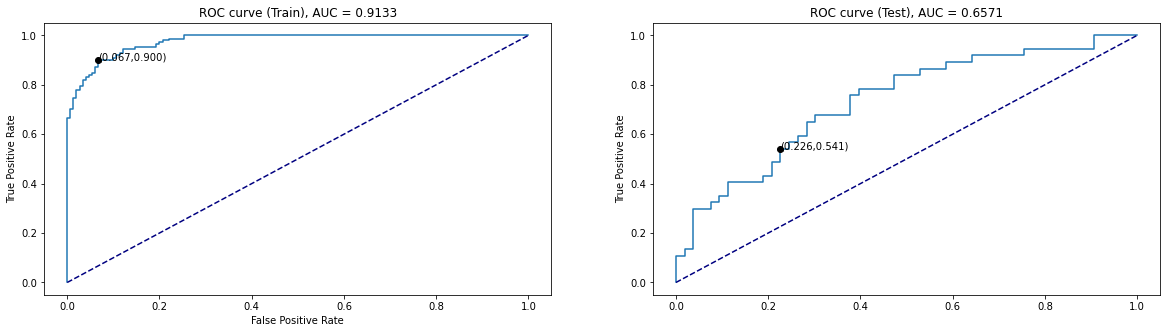

0.5007449929939204

In [52]:
y_test_pred_proba = ada_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = ada_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

4. Random forest

In [53]:
%%time
model =  RandomForestClassifier()

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

parameters = {'n_estimators': [100, 200, 300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2] }

rf_clf= GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
rf_clf.fit(X_train, y_train)

print('Best Score: ', rf_clf.best_score_*100, '\nBest Parameters: ', rf_clf.best_params_)

acc, f1, recall = evaluate_model_performance(rf_clf, X_val, y_val)
model_score.append(['Random Forest', acc, f1, recall])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   25.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed:  1.7min finished


Best Score:  84.33333333333334 
Best Parameters:  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
CPU times: user 1.55 s, sys: 107 ms, total: 1.65 s
Wall time: 1min 41s


Train Accuracy: 0.9966666666666667 
Train AUC: 0.9966666666666666 
Train Confusion Matrix:
[[150   0]
 [  1 149]]
Test Accuracy: 0.6444444444444445 
Test AUC: 0.592044875063743 
Test Confusion Matrix:
[[47  6]
 [26 11]]


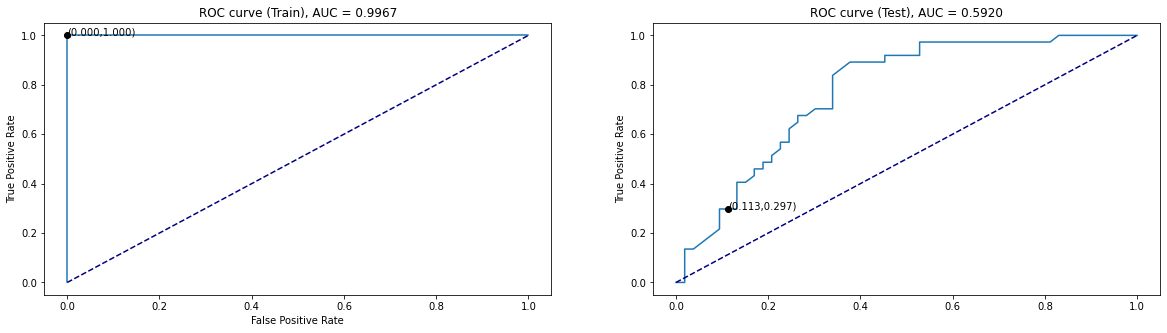

0.61

In [54]:
y_test_pred_proba = rf_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = rf_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

5. LightGBM

In [55]:
%%time

model = lgb.LGBMClassifier()
# Create parameters to search
gridParams = {
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [5, 10, 15, None],
    'min_data_in_leaf': [30, 50, 100],
    'boosting_type': ['gbdt', 'dart']
    }

# To view the default model params:
model.get_params().keys()

# Create the grid
lgb_clf = GridSearchCV(model, gridParams,
                    verbose=1,
                    cv = 5,
                    n_jobs = 4)
# Run the grid
lgb_clf.fit(X_train, y_train)

# Print the best parameters found
print(lgb_clf.best_params_)
print(lgb_clf.best_score_)

acc, f1, recall = evaluate_model_performance(lgb_clf, X_val, y_val)
model_score.append(['LightGBM', acc, f1, recall])

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.2s


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 30}
0.8300000000000001
CPU times: user 508 ms, sys: 31.4 ms, total: 539 ms
Wall time: 2.09 s


[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:    2.1s finished


Train Accuracy: 0.98 
Train AUC: 0.9800000000000001 
Train Confusion Matrix:
[[148   2]
 [  4 146]]
Test Accuracy: 0.7111111111111111 
Test AUC: 0.6812850586435493 
Test Confusion Matrix:
[[45  8]
 [18 19]]


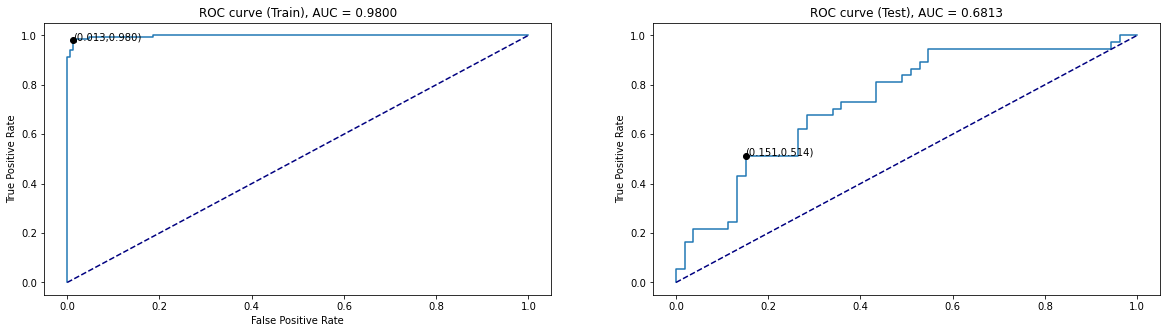

0.5091631474654704

In [56]:
y_test_pred_proba = lgb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = lgb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

### Model Evaluation

In [57]:
# Display the score of model with test data set
scores = pd.DataFrame(model_score, columns =['Model', 'Accuracy Score', 'F1 Score', 'Recall score'])
scores

,Model,Accuracy Score,F1 Score,Recall score
0,Gaussian Naive Bayes,0.688889,0.611111,0.594595
1,Logistic regression,0.677778,0.579710,0.540541
2,Adaboost classifier,0.666667,0.571429,0.540541
3,Random Forest,0.677778,0.539683,0.459459
4,LightGBM,0.711111,0.593750,0.513514


<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

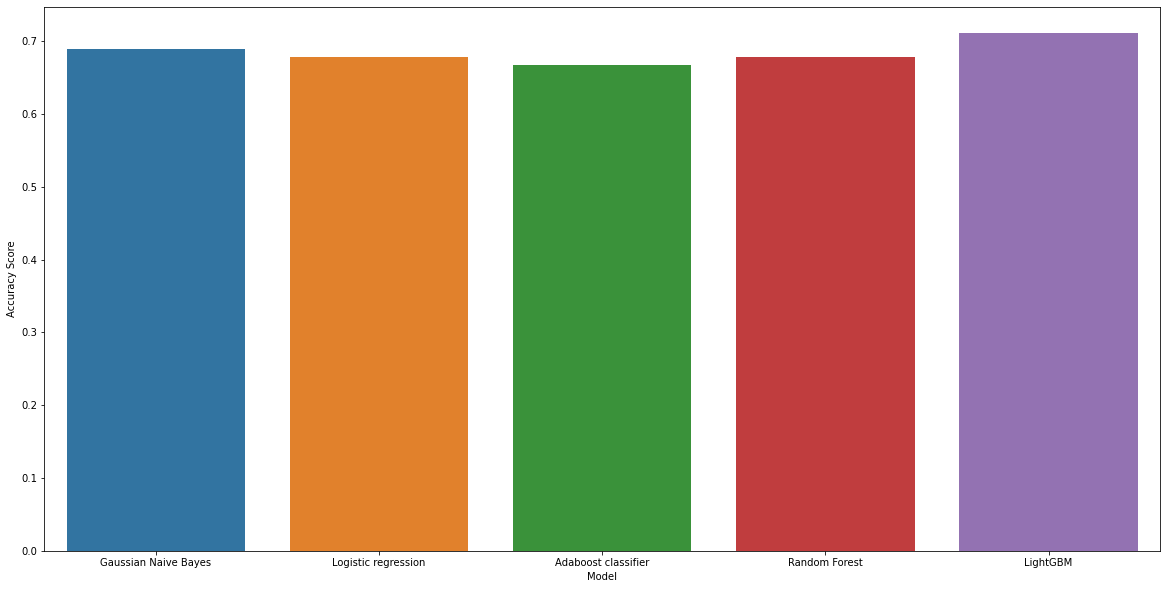

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=scores, x='Model', y='Accuracy Score',  ax=ax)

<AxesSubplot:xlabel='Model', ylabel='F1 Score'>

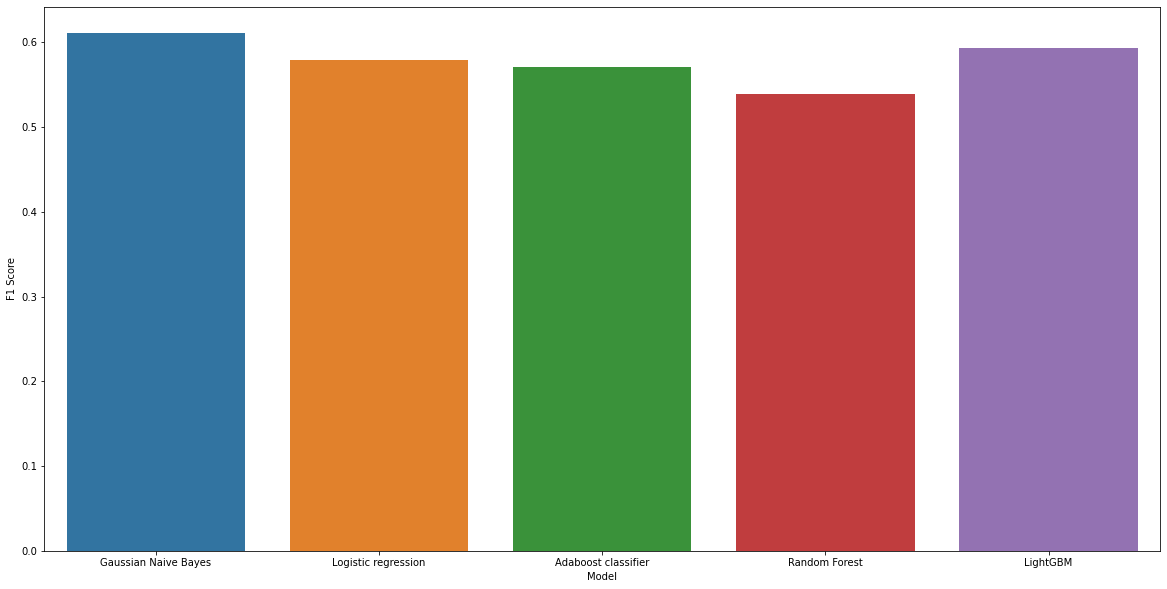

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=scores, x='Model', y='F1 Score',  ax=ax)

### Feature Ranking

anaemia                       8
high_blood_pressure           9
smoking                      10
sex                          33
diabetes                     50
serum_sodium                 65
ejection_fraction            75
creatinine_phosphokinase     97
age                          98
serum_creatinine            119
platelets                   132
dtype: int32


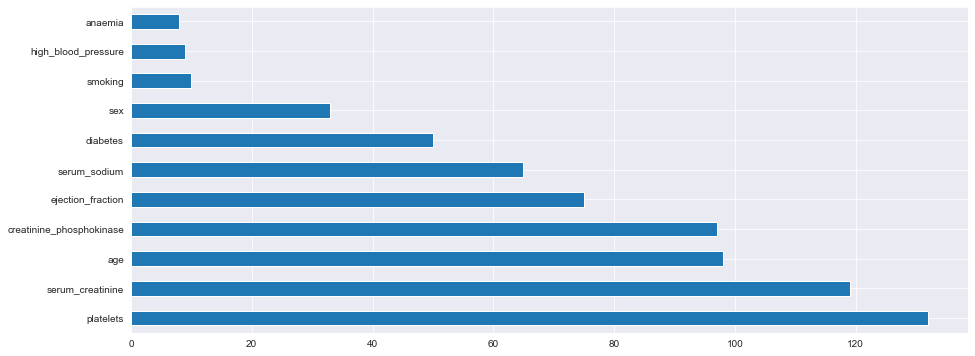

In [60]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

feat_importances = pd.Series(lgb_clf.best_estimator_.feature_importances_, index=X_train.columns)
print(feat_importances.sort_values(ascending=True))
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

anaemia                     0.016416
high_blood_pressure         0.020137
smoking                     0.024012
diabetes                    0.026508
sex                         0.039995
serum_sodium                0.093606
platelets                   0.105015
creatinine_phosphokinase    0.115019
age                         0.157286
ejection_fraction           0.173090
serum_creatinine            0.228915
dtype: float64


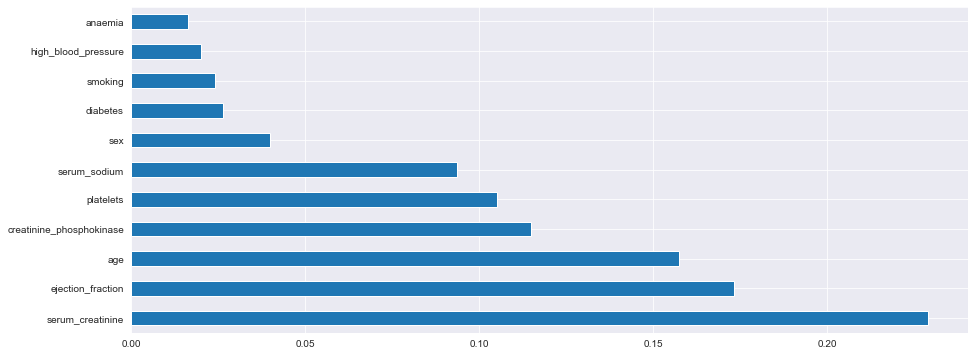

In [61]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

feat_importances = pd.Series(rf_clf.best_estimator_.feature_importances_, index=X_train.columns)
print(feat_importances.sort_values(ascending=True))

feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [62]:
y = data['DEATH_EVENT']
X_train = X_train.drop(['anaemia', 'high_blood_pressure', 'diabetes', 'smoking', 'sex'], axis=1)
X_val = X_val.drop(['anaemia', 'high_blood_pressure', 'diabetes', 'smoking', 'sex'], axis=1)



In [63]:

%%time

model = AdaBoostClassifier()

parameters = {
    'n_estimators': [200, 300, 500, 600, 800],
    'learning_rate':[0.001, 0.1, 0.2, 0.5]
}

ada_clf = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 5, n_jobs = 4)
ada_clf.fit(X_train, y_train)

print('Best Score: ', ada_clf.best_score_*100, '\nBest Parameters: ', ada_clf.best_params_)

acc, f1, recall = evaluate_model_performance(ada_clf, X_val, y_val)
model_score.append(['Adaboost classifier', acc, f1, recall])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.7s finished


Best Score:  81.66666666666667 
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 300}
CPU times: user 572 ms, sys: 24.7 ms, total: 596 ms
Wall time: 18.1 s


Train Accuracy: 0.8866666666666667 
Train AUC: 0.8866666666666668 
Train Confusion Matrix:
[[138  12]
 [ 22 128]]
Test Accuracy: 0.6777777777777778 
Test AUC: 0.657062723100459 
Test Confusion Matrix:
[[41 12]
 [17 20]]


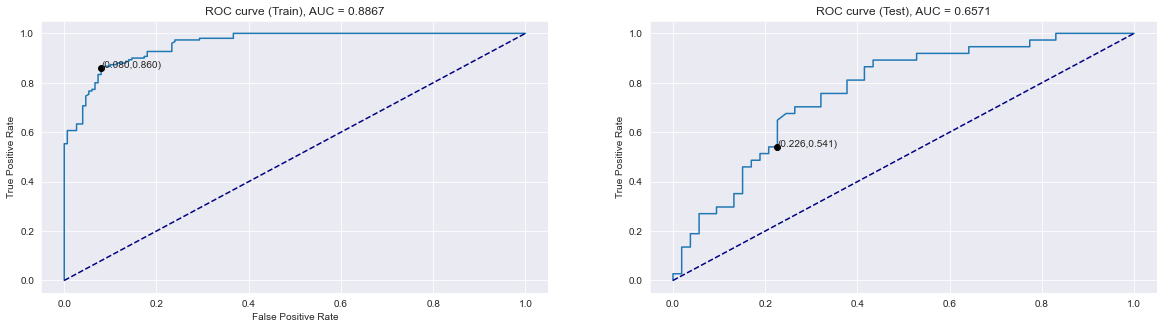

0.5018512061149069

In [64]:
y_test_pred_proba = ada_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = ada_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

In [65]:
acc, f1, recall = evaluate_model_performance(ada_clf, X_val, y_val)

print(acc)
print(f1)

0.7111111111111111
0.6578947368421052
